In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#Read the csv file
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df=pd.read_csv(filepath)

In [46]:
#display first five(5) entries
df.head(5)

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lbs,Price,Price_binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,90.32240,0.551724,8,256,3.52800,978,Low,0,1
1,1,Dell,3,1,1,3,100.64496,0.689655,4,256,4.85100,634,Low,1,0
2,2,Dell,3,1,1,7,100.64496,0.931034,8,256,4.85100,946,Low,1,0
3,3,Dell,4,2,1,5,85.80628,0.551724,8,128,2.69010,1244,Low,0,1
4,4,HP,4,2,1,7,100.64496,0.620690,8,256,4.21155,837,Low,1,0


In [28]:
#Chceck for missing data
missing_data=df.isnull()
missing_data.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
missing_data.sum()


Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [44]:
df.describe()

,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lbs,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,94.765330,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,0.776533,0.638282,0.235790,1.241787,7.522853,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,1.000000,1.000000,1.000000,3.000000,77.419200,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,90.322400,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,96.774000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,100.644960,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,111.612680,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [30]:
#Get the most frequent screen size and replace it with the null values
common_screen_size= df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan,common_screen_size, inplace=True)


In [31]:
#Get the mean weight and replace it with null values
avg_Weight_kg=df["Weight_kg"].astype("float").mean(axis=0)
df["Weight_kg"].replace(np.nan,avg_Weight_kg, inplace=True)
    
    

In [32]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [33]:
#check if null values are replaced
df.isnull().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [34]:
#fix data types for weight and screen size
df[["Weight_kg","Screen_Size_cm"]]=df[["Weight_kg","Screen_Size_cm"]].astype("float")

In [35]:
#Standadize the data, convert cm to inch
df["Screen_Size_cm"]=df["Screen_Size_cm"]*2.54

In [36]:
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

In [37]:
#Standadize the data, convert kg to lbs
df["Weight_kg"]=df["Weight_kg"]*2.205
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,90.32240,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,100.64496,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,100.64496,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,85.80628,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,100.64496,1.8,8,256,4.21155,837


In [38]:
#rename column to Weight_lbs
df.rename(columns={"Weight_kg":"Weight_lbs"},inplace=True)
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lbs,Price
0,0,Acer,4,IPS Panel,2,1,5,90.32240,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,100.64496,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,100.64496,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,85.80628,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,100.64496,1.8,8,256,4.21155,837


In [39]:
#normalising the cpu_frequency
df["CPU_frequency"]=df["CPU_frequency"]/df["CPU_frequency"].max()
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lbs,Price
0,0,Acer,4,IPS Panel,2,1,5,90.32240,0.551724,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,100.64496,0.689655,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,100.64496,0.931034,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,85.80628,0.551724,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,100.64496,0.620690,8,256,4.21155,837


In [40]:
bins=np.linspace(min(df["Price"]), max(df["Price"]),4)
group_names=["Low", "Medium", "High"]
df["Price_binned"]=pd.cut(df["Price"], bins, labels=group_names, include_lowest=True)


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lbs,Price,Price_binned
0,0,Acer,4,IPS Panel,2,1,5,90.32240,0.551724,8,256,3.52800,978,Low
1,1,Dell,3,Full HD,1,1,3,100.64496,0.689655,4,256,4.85100,634,Low
2,2,Dell,3,Full HD,1,1,7,100.64496,0.931034,8,256,4.85100,946,Low
3,3,Dell,4,IPS Panel,2,1,5,85.80628,0.551724,8,128,2.69010,1244,Low
4,4,HP,4,Full HD,2,1,7,100.64496,0.620690,8,256,4.21155,837,Low


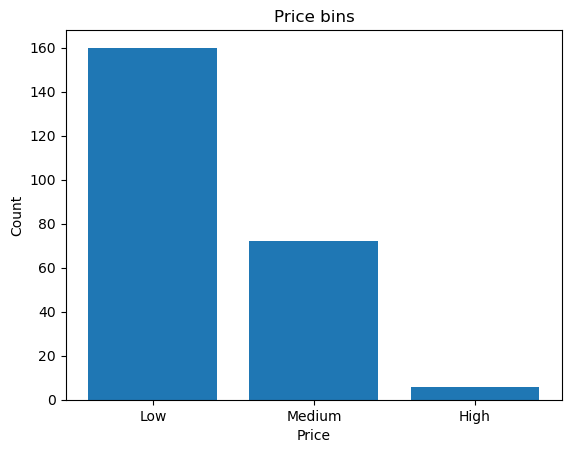

In [41]:
plt.bar(group_names, df["Price_binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price bins")
df.head(5)

In [42]:
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df=pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [43]:
df.head(5)

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lbs,Price,Price_binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,90.32240,0.551724,8,256,3.52800,978,Low,0,1
1,1,Dell,3,1,1,3,100.64496,0.689655,4,256,4.85100,634,Low,1,0
2,2,Dell,3,1,1,7,100.64496,0.931034,8,256,4.85100,946,Low,1,0
3,3,Dell,4,2,1,5,85.80628,0.551724,8,128,2.69010,1244,Low,0,1
4,4,HP,4,2,1,7,100.64496,0.620690,8,256,4.21155,837,Low,1,0
